LIBRARIES

In [1]:
from utils.utils import data_preparation, one_hot_encoder, GS_random_forest, rfc_train, rfc_test, prediction_vs_test, plot_confusion_matrix

%matplotlib inline

LOADING CLEAN DATASET

PREPARING DATA TO TRAIN DE MODEL

We divide the data into variables (X) and labels (y). 

Then, we make a **train_test_split** to split the data into the train and test values.

In [2]:
X_train, X_test, y_train, y_test = data_preparation(df_ubication = '../data/df_api.csv', 
                                                    label_column_name = 'Result',
                                                    test_size_rfc = 0.2, 
                                                    random_state_rfc = 42, 
                                                    stratify_rfc=True
                                                    )
    

In [4]:
X_train_onehot, X_test_onehot = one_hot_encoder(ohe_ubication = "../models/One_Hot_Encoder", 
                                                X_train = X_train, 
                                                X_test = X_test, 
                                                sparse_ohe = False)

RANDOMFOREST CLASSIFIER

First, we will make a GridSearch to find the best parameters to create the best prediction model

In [5]:
best_params_rfc = GS_random_forest(X_train_onehot, y_train)

{'max_depth': 50, 'max_features': 'log2', 'n_estimators': 500}


MODEL TRAINING

In [6]:
acc_rforest = rfc_train(X_train_onehot, y_train, best_params_rfc, 5, True, 42)

[0.73484937 0.79437542 0.70844824 0.23150833 0.74852883]


In [7]:
accuracy = rfc_test(X_test_onehot, y_test, X_train_onehot, y_train, best_params_rfc, "../models/web_predictor.model")

0.7354138398914518


In [8]:
prediction = prediction_vs_test(X_test_onehot, y_test, "../models/web_predictor.model")

      y_test  y_pred
0          2       2
1          2       1
2          2       2
3          2       1
4          1       2
...      ...     ...
2206       2       2
2207       2       2
2208       1       1
2209       1       1
2210       1       1

[2211 rows x 2 columns]


CONFUSION MATRIX

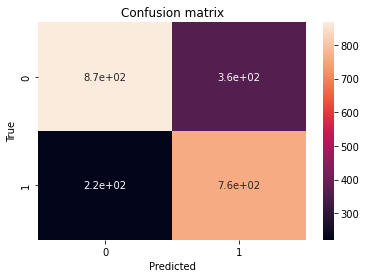

In [9]:
plot_confusion_matrix(y_test, "../models/web_predictor.model", X_test_onehot)